In [1]:
# dataset
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

m = data.shape[0]
X = data[:,:3]
y = data[:,3:]

maxi = np.max(X)
mini = np.min(X)
X = (X-mini) / (maxi-mini)

X_b = np.c_[np.ones((m, 1)), X]

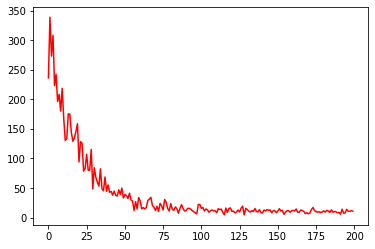

In [2]:
n_iterations = 50
minibatch_size = 20

thetas = np.random.randn(4, 1)
thetas_path = [thetas]    
losses = []

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]

        # tính output 
        output = xi.dot(thetas)

        # tính loss
        loss = (output - yi)**2

        # tính đạo hàm cho loss
        loss_grd = 2*(output - yi)/minibatch_size

        # tính đạo hàm cho các tham số
        gradients = xi.T.dot(loss_grd)

        # cập nhật tham số
        learning_rate = 0.01
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)

        loss_mean = np.sum(loss)/minibatch_size
        losses.append(loss_mean)

# in loss cho 100 sample đầu
x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()

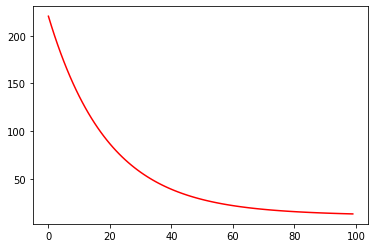

In [3]:
n_iterations = 100
learning_rate = 0.01

# khởi tạo giá trị tham số
thetas = np.random.randn(4, 1)
thetas_path = [thetas]
losses = []

for i in range(n_iterations):
    # tính output
    output = X_b.dot(thetas)

    # tính loss
    loss = (output - y)**2        

    # tính đạo hàm cho loss
    loss_grd = 2*(output - y)/m

    # tính đạo hàm cho các tham số
    gradients = X_b.T.dot(loss_grd)

    # cập nhật tham số
    thetas = thetas - learning_rate*gradients
    thetas_path.append(thetas)

    mean_loss = np.sum(loss)/m
    losses.append(mean_loss)

# in loss cho 100 sample đầu
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()